In [1]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

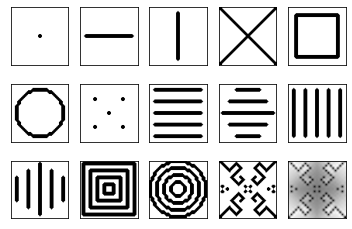

In [2]:
#Imagens básicas como entrada
img00 = cv.imread("../gcPDI/imgSimple/00sDot.png",0)
img01 = cv.imread("../gcPDI/imgSimple/01sHorizontal.png",0)
img02 = cv.imread("../gcPDI/imgSimple/02sVertical.png",0)
img03 = cv.imread("../gcPDI/imgSimple/03sX.png",0)
img04 = cv.imread("../gcPDI/imgSimple/04sSquare.png",0)
img05 = cv.imread("../gcPDI/imgSimple/05sCircle.png",0)
img10 = cv.imread("../gcPDI/imgSimple/10mDots.png",0)
img11 = cv.imread("../gcPDI/imgSimple/11mHorizontals.png",0)
img12 = cv.imread("../gcPDI/imgSimple/12mHorizontals2.png",0)
img13 = cv.imread("../gcPDI/imgSimple/13mVerticals.png",0)
img14 = cv.imread("../gcPDI/imgSimple/14mVerticals2.png",0)
img15 = cv.imread("../gcPDI/imgSimple/15mSquares.png",0)
img16 = cv.imread("../gcPDI/imgSimple/16mCircles.png",0)
img20 = cv.imread("../gcPDI/imgSimple/20random.png",0)
img21 = cv.imread("../gcPDI/imgSimple/21colorRandom.png",0)
simpleImg = [img00, img01, img02, img03, img04, img05, img10, img11, img12, img13, img14, img15, img16, img20, img21]              
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(simpleImg[i],cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

## Laplaciano
(Laplacian)

### Teoria 

O Filtro de Laplace pode ser entendido como um filtro passa-alta, com características de atenuar intereferências abaixo da frequência de corte do filtro. O Laplaciano de uma imagem destaca regiões de rápida mudança de intensidade, sendo frequentemente usado para detecção de bordas.

No caso do **Filtro Laplaciano**, sua atuação se dá em relação à segunda derivada da intensidade da imagem.

### Manipulações com OpenCV

ksize = 3


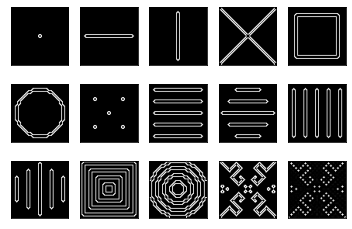

ksize = 5


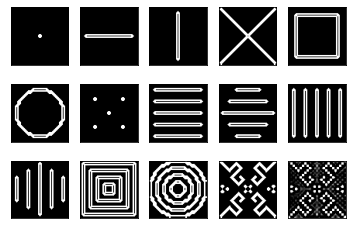

ksize = 7


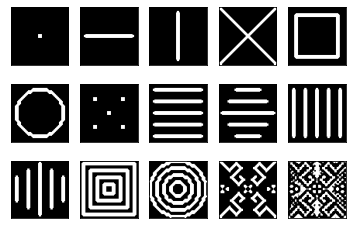

ksize = 9


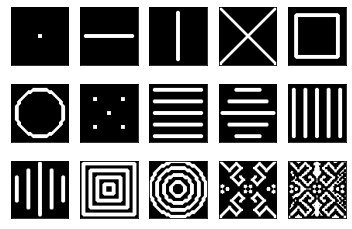

In [3]:
for ksize in range(3,10,2):
    for i in range(15):
        plt.subplot(3,5,i+1)
        dst=cv.Laplacian(simpleImg[i],cv.CV_8U, ksize = ksize) #Entrada, ddepth, kernel
        plt.imshow(dst,cmap='gray')
        plt.xticks([]),plt.yticks([])
    print("ksize = {}".format(ksize))
    plt.show()

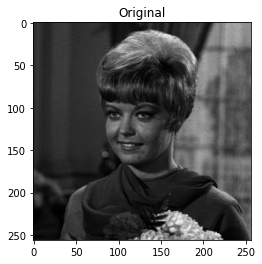

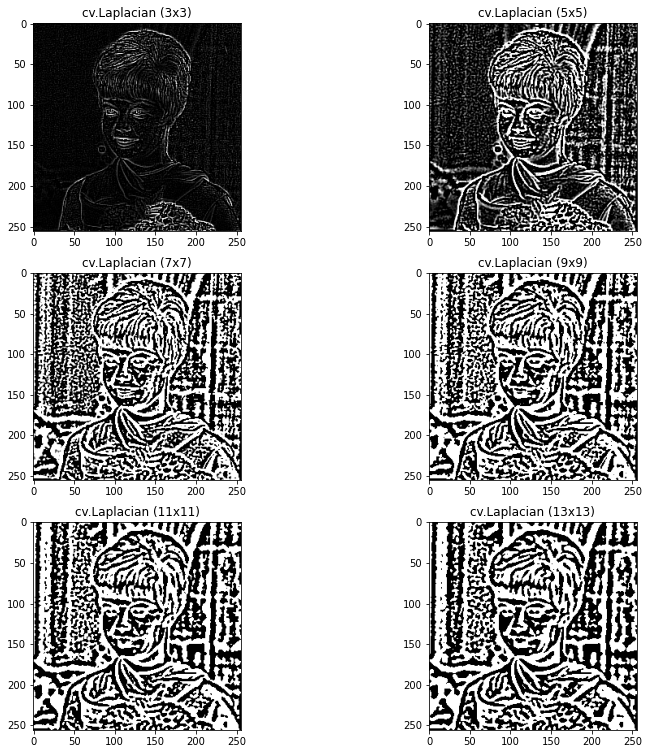

In [4]:
#Loop para 6 kernels
img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i=0
for kSize in range(3,15,2):        
    dst=cv.Laplacian(img,cv.CV_8U,ksize=kSize) #Entrada, ddepth, kernel
    f.set_figheight(13)
    f.set_figwidth(13)    
    if kSize < 6 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.Laplacian ({}x{})".format(kSize,kSize))
    elif kSize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.Laplacian ({}x{})".format(kSize,kSize))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.Laplacian ({}x{})".format(kSize,kSize))
    i+=1
plt.show()  

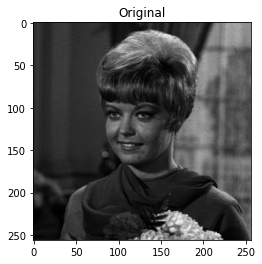

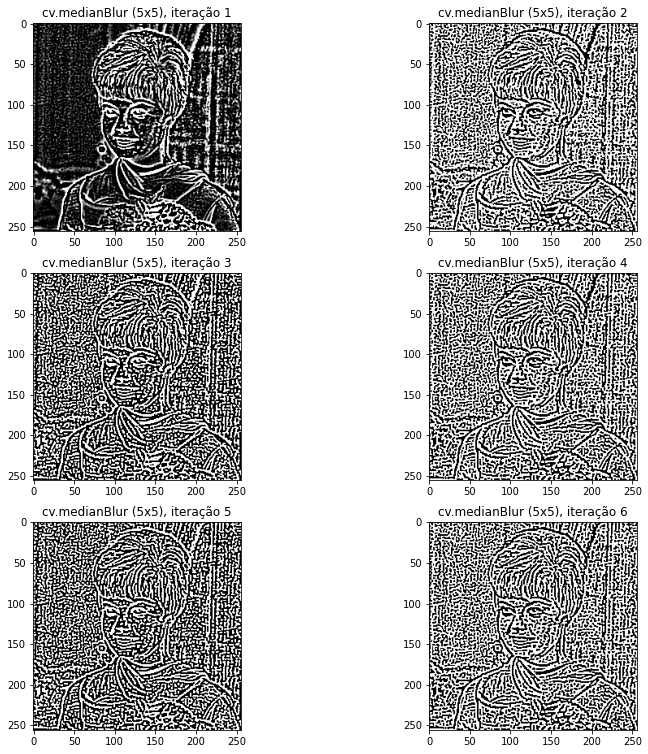

In [5]:
#Loop para 6 Iterações
dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
kSize=5
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst=cv.Laplacian(dst,cv.CV_8U,ksize=kSize) #Entrada, ddepth, saída, kernel
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
plt.show()

### Desenvolvimento do Filtro

**Filtro Média** pode ser entendido como uma integração, já o **Filtro Laplaciano** uma derivação do sinal de segunda ordem, representada no domínio do tempo discreto por:
$$L(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$
$$\frac{\partial^2 f}{\partial x^2} = f(x) +  f(x-1) - 2f(x)$$

O kernel desse filtro pode ser representado da seguinte forma, utilizando o conceito de 8 adjacentes vizinhos:

$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x)$$
$$\frac{\partial^2 f}{\partial x^2} = f(x+1,y+1) + f(x-1,y+1) - 2f(x)$$

$$\frac{\partial^2 f}{\partial x^2} = f(x,y+1) + f(x,y-1) - 2f(x)$$
$$\frac{\partial^2 f}{\partial x^2} = f(x-1,y+1) + f(x-1,y-1) - 2f(x)$$

$$\left( \begin{array}{ccc}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1 \end{array} \right)\ $$

A aplicação desse filtro é uma representação da adaptada da convolução digital para imagens.

In [10]:
def filterLaplace (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf
    # Load image into numpy matrix
    A = Filter.img
    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape
    #################### Laplace filter
    ## Pre-set steps:
    Filter.kernel = np.ones((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel[int(Filter.kernelSize/2), int(Filter.kernelSize/2)] = -1*(np.sum(Filter.kernel)-1)
    #################
    central = m.floor((Filter.kernelSize / 2))
    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A
    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    soma = 0;
    D = np.zeros(A.shape)
    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):
                    # print(C[j + kl, k + kk])
                    # print(kernel[kl, kk])
                    # print('Result is: %d ' %(C[j + kl,k + kk] * kernel[kl,kk]))
                    soma = (C[j + kl, k + kk] * Filter.kernel[kl, kk]) + soma
            value = m.ceil((soma / (Filter.kernelSize * Filter.kernelSize)))
            soma = 0
            D[j, k] = value
    D = np.uint8(D)
    print('#',end=".")
    return D

In [11]:
def lapApply(img, ks, napl):
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype()                
    Filter.img = np.array(img)
    Filter.imgSize = nf.structtype()
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape
    #################### Filtro da média
    # Kernel def:
    Filter.kernelSize = ks
    # Número de aplicações do filtro
    numAp = napl;
    # Variável auxiliar para guardar a saída
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))
    for k in range(0, numAp):
        if k == 0:
            U[k,:,:] = filterLaplace(Filter)
            #print(U[k, :, :])
        else:
            Filter.img = U[k-1,:,:]
            U[k, :, :] = filterLaplace(Filter)
            #print(U[k,:,:])
    return U[(numAp - 1),:,:]

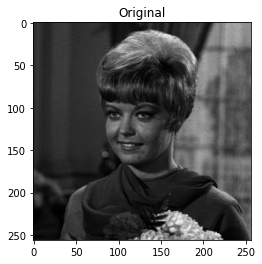

#.#.#.#.#.#.

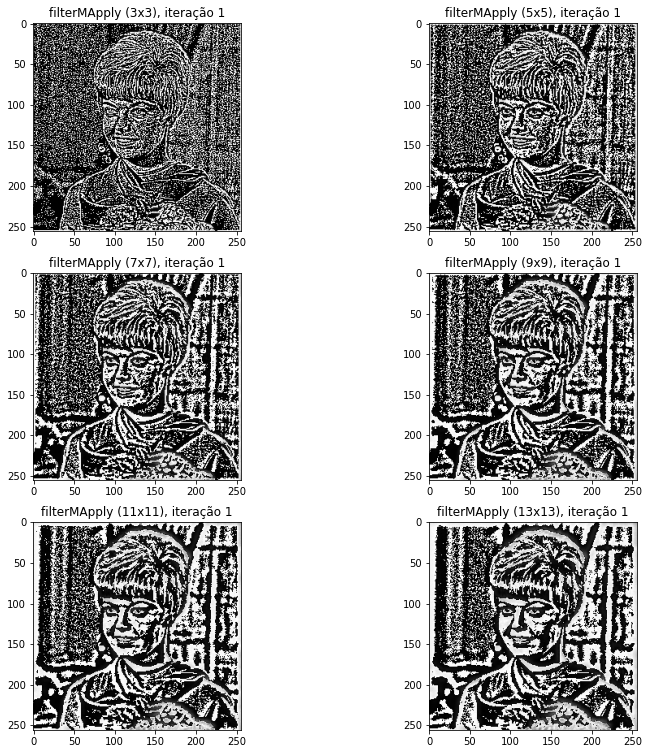

In [12]:
#Loop para 6 Kernels
src = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(src,cmap="gray")
plt.title("Original")
plt.show()
#Entradas do kernel e de iterações
#ksize = 5
nits = 1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i = 0
for ksize in range(3,15,2):
    dst = lapApply(src, ksize, nits)
    f.set_figheight(13)
    f.set_figwidth(13)    
    if ksize < 7 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    elif ksize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    i+=1
plt.show()

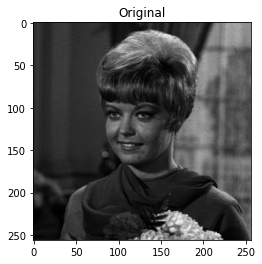

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.

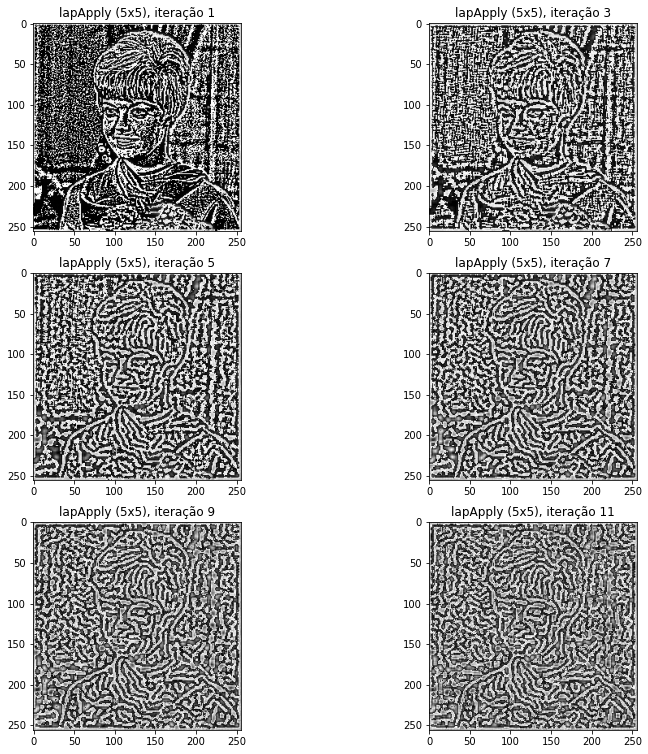

In [15]:
#Loop para 6 Iterações
src = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(src,cmap="gray")
plt.title("Original")
plt.show()
ksize=5
#nit=1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = lapApply(src, ksize, (i*2)+1)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("lapApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("lapApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("lapApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
plt.show()

Imagens de análise:


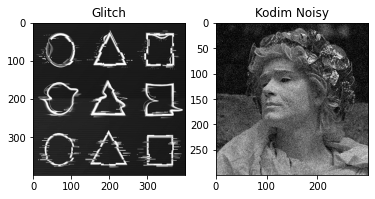

#.#.
 Kernel Size: 15, Iterações: 1


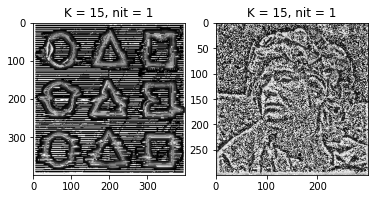

In [16]:
#Entradas do kernel e de iterações
ksize = 15 #<--
nits = 1
#Loop para A&B -> testar kernel
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = lapApply(imgA, ksize, nits)
imgBG = lapApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Imagens de análise:


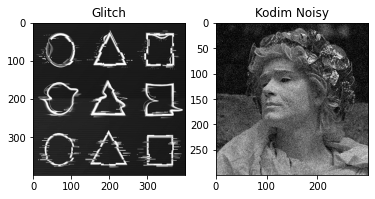

#.#.#.#.#.#.#.#.#.#.#.#.#.#.
 Kernel Size: 5, Iterações: 7


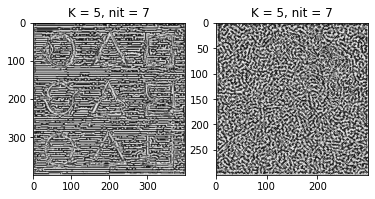

In [17]:
#Entradas do kernel e de iterações
ksize = 5
nits = 7 #<--
#Loop para A&B -> testar iteração
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = lapApply(imgA, ksize, nits)
imgBG = lapApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

#### Conclusões
As notáveis diferenças entre as implementações realizadas e as implementadas pela bibliotecas *OpenCV* se devem em um motivo pelo *OpenCV* chamar internamente o seu filtro Sobel, dentre outras manipulações internas.

resultando em uma possível identificação e relação com a imagem original.

A utilização do **Filtro Laplaciano** realça as bordas da imagem, mas também irá realçar ou introduzir ruídos, o que em múltiplas aplicações acaba confundido a bordas com ruídos e prejudicando a imagem. Assim, não parece interessante altos números de iterações para esse filtro.

Utilizar kernel menores realçam regiões contidas em si, enquanto kernel maiores realçam os contornos principais da imagem. Novamente, é preciso estudar a imagem previamente para definir quais detalhes se quer realçar

Uma das recomendações de usar esse filtro é utilizar em conjunto com um filtro passa-baixa para diminuir ruídos.

Imagens de análise:


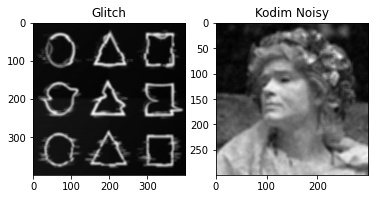

#.#.
 Kernel Size: 15, Iterações: 1


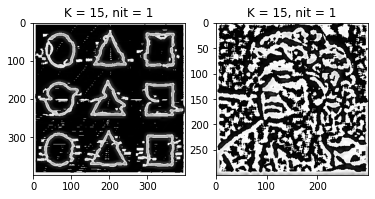

In [22]:
#Entradas do kernel e de iterações
ksize = 15 #<--
nits = 1
#Loop para A&B -> testar kernel
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
imgA = cv.blur(imgA,(7,7))
imgB = cv.blur(imgB,(7,7))
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = lapApply(imgA, ksize, nits)
imgBG = lapApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Imagens de análise:


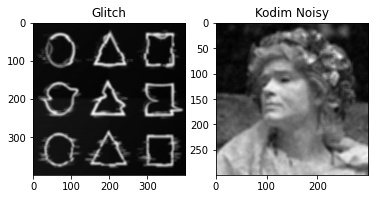

#.#.#.#.#.#.#.#.#.#.#.#.#.#.
 Kernel Size: 3, Iterações: 7


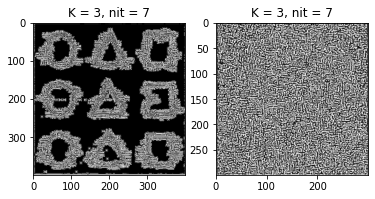

In [23]:
#Entradas do kernel e de iterações
ksize = 3
nits = 7 #<--
#Loop para A&B -> testar iteração
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
imgA = cv.blur(imgA,(7,7))
imgB = cv.blur(imgB,(7,7))
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = lapApply(imgA, ksize, nits)
imgBG = lapApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()